In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

from src import drawing_functions

folder_path = 'data/processed data/'

communities = ["physics",
               "astronomy",
               "052012-theoretical-physics", 
               "052012astronomy", 
               "052012economics", 
               "052012-literature", 
               "literature", 
               "economics", 
               "startups",
               "122013-answers-onstartups"
            ] 

# dictionaries to keep dataframes for all communities:
data_questions = {}
data_rep_agg = {}
data_nets = {}
data_coreper = {}

for comm in communities:
    # active questions data
    # aggragated data about dynamical reputations:
    data_rep_agg[comm] = pd.read_csv(folder_path+'%s_dynamic_reputation_aggregates.csv'%(comm))
    # interaction networks + dynamical reputations data:
    data_nets[comm] = pd.read_csv(folder_path+'%s_dyn_rep_and_networks_features.csv'%(comm))
    # core periphery data:
    data_coreper[comm] = pd.read_csv(folder_path+'%s_dyn_rep_and_core_periphery_features.csv'%(comm))
    
    
def plot_data(communities, features, label_feat, df, xlim):
    
    n=len(features)
    N=len(communities)
    fig, axes = plt.subplots(n, N, figsize=(N*3, n*2), sharey='row')
    i=0
    j=0
    for feat in features:
        j=0
        for comm in communities:
            axes[i, j].plot(df[comm][feat])
            axes[0,j].set_title(comm, fontsize=15)
            axes[i,0].set_ylabel(label_feat[feat], fontsize=15)

            axes[i, j].set_xlim(0,xlim)
            j+=1
            #print(N, i)
            if j==(N):
                i+=1

In [2]:
def compare_comm(comms):
    
    plt.figure(figsize = (16,3))
    plt.subplot(1,4,1)

    for comm in comms :

        plt.plot(data_rep_agg[comm]["Number of active users"], label=comm)
        plt.xlim(0,180)
    plt.title("Active users")

    plt.legend()
    plt.subplot(1,4,2)

    for comm in comms :

        plt.plot(data_rep_agg[comm]["Mean user reputation"], label=comm)
        plt.xlim(0,180)

    plt.title("Mean reputation")


    plt.subplot(1,4,3)

    for comm in comms :

        plt.plot(data_coreper[comm]["N_core"], label=comm)
        plt.xlim(0,150)

    plt.title("Ncore")


    plt.subplot(1,4,4)

    for comm in comms :

        plt.plot(data_coreper[comm]["Mean_dr_core"], label=comm)
        plt.xlim(0,150)
    plt.title("dr core")

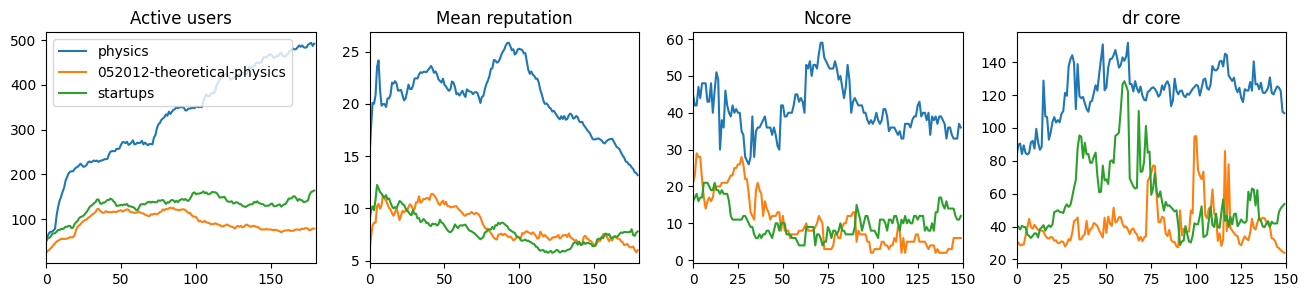

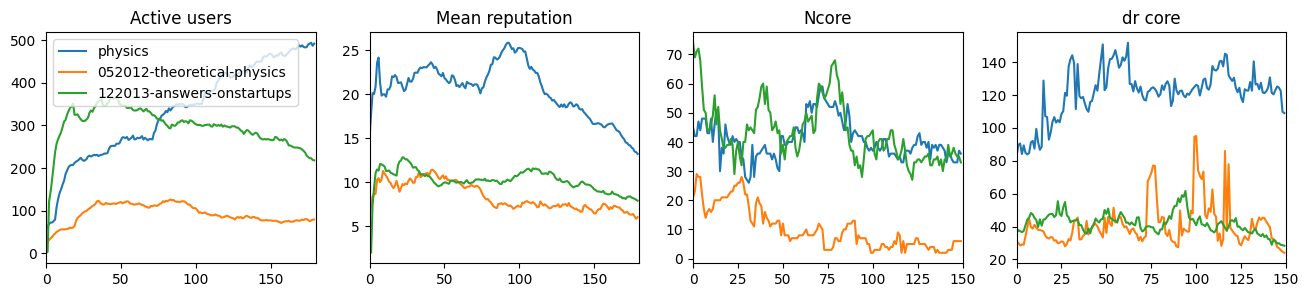

In [4]:
#TODO: match style with other figures

comms = ["physics", "052012-theoretical-physics", "startups"]
compare_comm(comms)
#plt.savefig(save_path+'physics-startups-comp.pdf', dpi=300, bbox_inches='tight')

plt.show()

comms = ["physics", "052012-theoretical-physics", "122013-answers-onstartups"]
compare_comm(comms)
#plt.savefig(save_path+'physics-ansstartups-comp.pdf', dpi=300, bbox_inches='tight')

plt.show()